In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')






6

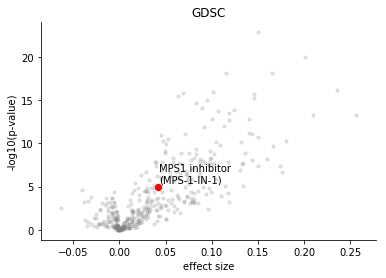

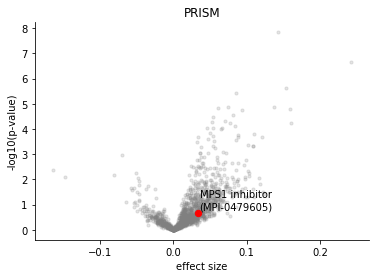

In [3]:
##########################################################################################
######################################### figex 4a #######################################
##########################################################################################


GDSC = pd.read_csv('Limma/drug_comparisons/GDSC_NEW.csv',index_col=0)




drug_name_GDSC = 'MPS-1-IN-1'


fix,ax = plt.subplots()
plt.scatter(GDSC.loc[:,'EffectSize'],-np.log10(GDSC.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(GDSC.loc[drug_name_GDSC,'EffectSize'],-np.log10(GDSC.loc[drug_name_GDSC,'p.value']),alpha=1,color='red',s=40)

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('GDSC')
plotting.simpleaxis(ax)


texts = []
for txt in sorted([drug_name_GDSC]):#,'KIF18A (81930)']):
    texts.append(plt.text(GDSC.loc[txt,'EffectSize'], -np.log10(GDSC.loc[txt,'p.value']),'MPS1 inhibitor\n(' + txt.split(' ')[0] + ')',color='black'))
adjust_text(texts)
# plt.savefig('fig3b/GDSC.pdf')




prism = pd.read_csv('Limma/drug_comparisons/prism_NEW.csv',index_col=0)


drug_name_prism = 'MPI-0479605'


fix,ax = plt.subplots()
plt.scatter(prism.loc[:,'EffectSize'],-np.log10(prism.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(prism.loc[drug_name_prism,'EffectSize'],-np.log10(prism.loc[drug_name_prism,'p.value']),alpha=1,color='red',s=40)

#plt.xlim(-1.3,1.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('PRISM')
plotting.simpleaxis(ax)


texts = []
for txt in sorted([drug_name_prism]):#,'KIF18A (81930)']):
    texts.append(plt.text(prism.loc[txt,'EffectSize'], -np.log10(prism.loc[txt,'p.value']),'MPS1 inhibitor\n(' + txt.split(' ')[0] + ')',color='black'))
adjust_text(texts)
# plt.savefig('fig3b/prism.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


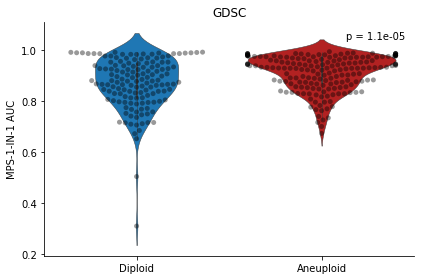

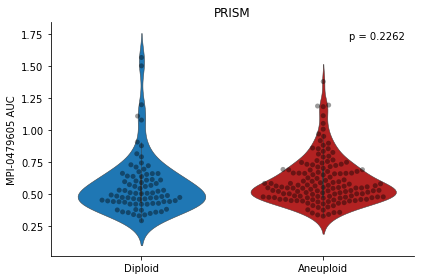

In [8]:
##########################################################################################
######################################### figex 4b #######################################
##########################################################################################

from taigapy import TaigaClient
tc = TaigaClient()
from scipy import stats
ctd_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='ctd_matrix')
sanger_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='sanger_matrix')
prism_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='secondary_matrix')

shared = set(anot.index) & set(sanger_matrix.index)
temp = sanger_matrix.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

drug_name_GDSC

fig,ax = plt.subplots()
sns.violinplot(y = drug_name_GDSC,x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = drug_name_GDSC,x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel(drug_name_GDSC + ' AUC')
plotting.simpleaxis()
plt.tight_layout()


tt,p_val = stats.ttest_ind(temp.loc[trus,drug_name_GDSC].dropna(),temp.loc[falsee,drug_name_GDSC].dropna())
ax.legend(title='p = '+ str(round(p_val,6)),frameon=False)
plt.title('GDSC')
plt.tight_layout()
# plt.savefig('fig3c/gdsc.pdf')


#PRISM

shared = set(anot.index) & set(prism_matrix.index)
temp = prism_matrix.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

fig,ax = plt.subplots()
sns.violinplot(y = drug_name_prism,x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = drug_name_prism,x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel(drug_name_prism + ' AUC')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,drug_name_prism].dropna(),temp.loc[falsee,drug_name_prism].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('PRISM')
plt.tight_layout()
# plt.savefig('fig3c/prism.pdf')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


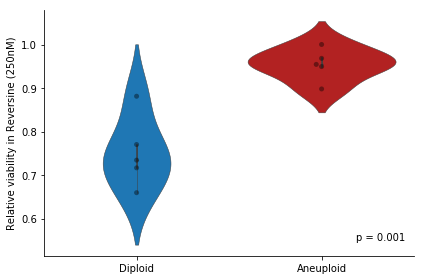

In [9]:
##########################################################################################
######################################### figex 4c #######################################
##########################################################################################

data = pd.read_csv('10CL_reversine_for_plot.csv',index_col='cell line')

data['ploidy'] = ''
data.loc[data.index[0:5],'ploidy'] = 'Aneuploid'
data.loc[data.index[5:],'ploidy'] = 'Diploid'

data

ax=sns.violinplot(y = 'viability',x='ploidy', data = data,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'viability',x='ploidy', data = data,color='black',alpha=.4,order=my_order)

plt.xlabel('')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(data.loc[data.index[0:5],'viability'].dropna(),data.loc[data.index[5:],'viability'].dropna())
ax.legend(title='p = '+ str(round(p_val,3)),frameon=False,loc='lower right')
plt.ylabel('Relative viability in Reversine (250nM)')
plt.tight_layout()
# plt.savefig('supp1/extra_violin_plot.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.7407_Aneuploid v.s. 0.7407_Diploid: t-test independent samples, P_val=3.206e-03 stat=2.974e+00
2.2222_Aneuploid v.s. 2.2222_Diploid: t-test independent samples, P_val=2.968e-02 stat=2.186e+00
6.6667_Aneuploid v.s. 6.6667_Diploid: t-test independent samples, P_val=3.064e-02 stat=2.173e+00
20.0_Aneuploid v.s. 20.0_Diploid: t-test independent samples, P_val=1.537e-02 stat=2.439e+00
0.2469_Aneuploid v.s. 0.2469_Diploid: t-test independent samples, P_val=6.659e-03 stat=2.735e+00
0.0009_Aneuploid v.s. 0.0009_Diploid: t-test independent samples, P_val=8.378e-01 stat=2.050e-01
0.0091_Aneuploid v.s. 0.0091_Diploid: t-test independent samples, P_val=7.997e-01 stat=-2.540e-01
0.0274_Aneuploid v.s. 0.0274_Diploid: t-test independent samples, P_val=7.451e-01 stat=3.254e-01
0.0823_Aneuploid v.s. 0.0823_Diploid: t-test independent sample

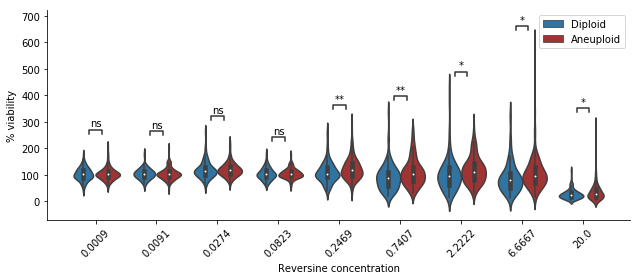

In [10]:
##########################################################################################
######################################### figex 4d #######################################
##########################################################################################

### figure 3d

reversine = pd.read_csv('Table S5_Reversine AUC - Table S5_Reversine AUC.csv',index_col=0)

reversine_doses = pd.read_table('Rev_file_for_boxplot_single_doses_comparison.txt',index_col=0)

#sns.kdeplot(reversine.loc[:,'Reversine'])

from statannot import add_stat_annotation

#remake boxplot

fix,ax = plt.subplots(figsize=(9,4))

shared = set(anot.loc[:,'CCLE_ID']) & set(reversine_doses.index)
temp = reversine_doses.loc[shared]
temp = temp.drop('Aneuploidy_status',axis=1)

temp = pd.melt(temp.reset_index(), id_vars='CCLE_ID')
temp.index = temp.loc[:,'CCLE_ID']
temp.columns = ['drop','dose','viability']
temp = temp.drop('drop',axis=1)

temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

for x in set(temp.loc[:,'dose']):
    temp = temp.replace(x,round(float(x),4))

ax = sns.violinplot(x="dose", y="viability", hue="ploidy",
                     data=temp,palette = my_pal, order = sorted(list(set(temp.loc[:,'dose']))),
                   hue_order=['Diploid','Aneuploid'])#palette="muted")

plotting.simpleaxis(ax)
plt.xticks(rotation=45) 

plt.xlabel('Reversine concentration')
plt.ylabel('% viability')


box_pairs=[
    ((0.0009, "Diploid"), (0.0009, "Aneuploid")),
    ((0.0091, "Diploid"), (0.0091, "Aneuploid")),
    ((0.0274, "Diploid"), (0.0274, "Aneuploid")),
    ((0.0823, "Diploid"), (0.0823, "Aneuploid")),
    ((0.2469, "Diploid"), (0.2469, "Aneuploid")),
    ((0.7407, "Diploid"), (0.7407, "Aneuploid")),
    ((2.2222, "Diploid"), (2.2222, "Aneuploid")),
    ((6.6667, "Diploid"), (6.6667, "Aneuploid")),
    ((20.0, "Diploid"), (20.0, "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp, x='dose', y='viability', hue='ploidy', width=width,order = sorted(list(set(temp.loc[:,'dose']))),
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2, )


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()

# plt.savefig('fig3d/reversine_boxplot.pdf')

In [42]:
from cds import prediction as p
features = p.assemble_feature_set(
    # feature sets from taiga where every column is numerical. 
    # The keys of the dict will be appended to feature columns,
    # so it is possible to identify the type of feature
    taiga_matrices = {
            'CN': dict(name='depmap-wes-cn-data-97cc', version=26, 
                       file='public_19Q4_gene_cn'),
            'Exp': dict(name='depmap-rnaseq-expression-data-ccd0', version=16, 
                        file='public_19Q4_tpm'),
            'Dam': dict(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation'),
            'Miss': dict(name='depmap-mutation-calls-9a1a', version=14, file='other_mutation'),
            'Hot': dict(name='depmap-mutation-calls-9a1a', version=14, file='hotspot_mutation'),
#             'Prot': dict(name='depmap-rppa-1b43', version=3, file='CCLE_RPPA_20181003'),
#             'Metab': dict(name='metabolomics-cd0c', version=4, file='CCLE_metabolomics_20190502'),
            #'Meth': dict(name='rrbs-4b29', version=4, file='CCLE_RRBS_TSS_CpG_clusters_20180614')
            
        },
    # for mixed data types, we can specify which columns we want as numerical 
    # and which as categorical. Categorical variables do not have the dict key appended.
    # The column name is appended instead.
    taiga_tables = {},
#             'Histology': dict(
#                 taiga_args=dict(name='avana-public-tentative-19q4-c2df', version=4, file='sample_info'),
#                 index_col='DepMap_ID',
#                 categorical_cols=['primary_tissue', 'secondary_tissue', 'tertiary_tissue'],
#                 numerical_cols=[]
#             ),
# #         'Confounder': dict(
# #             taiga_args=dict(name='confounders-2598', version=1, file='confounders_18Q4_public'),
# #             index_col='Row.name',
# #             categorical_cols=[],
# #             numerical_cols=[
# #                 'SSMD', 'cas9', 'DMEM_media', 'RPMI_media', 'EMEM_media',
# #                'IMDM_media', 'McCoy_media', 'FBS_media', 'suspension_culture',
# #                'mixed_culture', 'semi-adherent_culture', 'adherent_culture'
# #             ]
# #         )
#         },
    # We can specify the list of feature types that must be present
    # in order to retain a row in the feature matrix.
    presence_required = ['Exp','Dam','CN'],#'Dam', 'Miss', 'Confounder'],
    # Fill loose NaNs with 0s
    fill_na=True
)

loading taiga matrices
	loading CN
	loading Exp
	loading Dam
	loading Miss
	loading Hot
loading local matrices
loading taiga tables
loading local tables
normalizing features
	CN
	Exp
	Dam
	Miss
	Hot
joining features
	CN
	Exp
	Dam
	Miss
	Hot


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/cds/prediction/ensemble_predictor.py:428: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  out = df.loc[cells]


filling NaNs


In [111]:
features = temp.copy()

In [112]:
##########################################################################################
######################################### figex 4d #######################################
##########################################################################################


sample_info = tc.get(name='public-19q4-93d9', version=21, file='sample_info')

sample_info.index = sample_info.loc[:,'CCLE_Name']


Ys = pd.read_csv('Table S5_Reversine AUC - Table S5_Reversine AUC.csv',index_col=0)

sh = set(sample_info.index & Ys.index)

Ys = Ys.loc[sh]

Ys.index = sample_info.loc[Ys.index,'DepMap_ID']

# Ys['CCLE'] = Ys.index
#Ys = Ys.drop(['PEDS005TADH_KIDNEY'])
# Ys.index = cell_line_mapper.ccle_to_arxspan(Ys.index)
dep = Ys.loc[:,'Reversine']

# from taigapy import TaigaClient
# tc = TaigaClient()
# dependency = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

# dependency.columns = dependency.columns.str.split(' ').str[0]

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

anot_ = anot.loc[:,'num_arm_events']


features['num_arm_events'] = anot_




features = features.dropna()
dep = dep.loc[set(dep.index & anot.index)]

features = features.loc[list(set(features.index) & set(dep.index) & set(anot_.index))]
dep = dep.loc[list(set(features.index) & set(dep.index) & set(anot_.index))]


#dep = Ys.loc[:,'Reversine']

dep_ = pd.DataFrame(dep)


    
p.run_subset(X=pd.DataFrame(features.loc[dep_.index]), Y=dep_, start_col=0, n_col=1, task='regress', 
             included_models=['KitchenSink']
             )


aligning features


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/cds/prediction/ensemble_predictor.py:717: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


creating models
creating ensemble
fitting ensemble to 1 columns


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:292: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mkazachk/miniconda3/lib/py

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:292: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mkazachk/miniconda3/lib/py

1000
68.952140 elapsed, 100% complete, 0.000000 estimated remaining
saving results to regress_save0_1


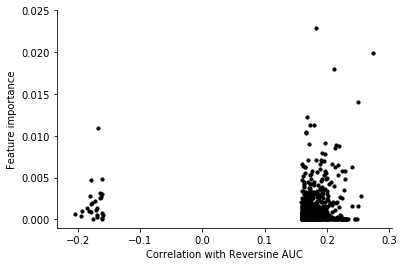

In [118]:
# feature importance in feats.csv
feats = pd.read_csv('feats.csv',index_col=0)
feats = feats.iloc[0]

#plt.subplots(figsize=(10,4))
xs = []
ys = []

cors = pd.Series(index = feats.index)
for i in range(0,1000):
    f = feats.index[i]
    y_ = feats.loc[f]
    x_ = features.loc[:,f].corr(dep)
    xs.append(x_)
    ys.append(y_)
    cors[f] = x_
plt.scatter(xs,ys,color='black',alpha=1,label='feature',s=10)
#plt.legend()
plt.ylim(-.001,.025)
plt.ylabel('Feature importance')
plt.xlabel('Correlation with Reversine AUC')
plotting.simpleaxis()
plt.savefig('zoomed_UPDATED.pdf')